In [1]:
import pandas as pd
# data = pd.read_csv("0819_UkraineCombinedTweetsDeduped.csv")
# data.head(10)
data = pd.read_json("tweets\\{user}-1000.json".format(user="ZelenskyyUa"), lines=True)



In [2]:
import nltk
#nltk.download('subjectivity')

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)
subj_docs[0]

train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs

sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8


In [8]:
from nltk import tokenize
#nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentences = []
for tweet_text in data.head(100)['content']:
    lines_list = tokenize.sent_tokenize(tweet_text)
    sentences.extend(lines_list)
#print('sentences', sentences)
compound_scores = []
for sentence in sentences:
    sid = SentimentIntensityAnalyzer()
    # print(sentence)
    ss = sid.polarity_scores(sentence)
    compound_scores.append(ss['compound'])
    # for k in sorted(ss):
    #     print('{0}: {1}, '.format(k, ss[k]), end='')
    # print("\n------")

https://github.com/cjhutto/vaderSentiment#about-the-scoring
    positive sentiment: compound score >= 0.05
    neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    negative sentiment: compound score <= -0.05


(array([  9.,   7.,   8.,   7., 210.,  12.,  13.,  13.,  30.,  24.]),
 array([-0.8316 , -0.65822, -0.48484, -0.31146, -0.13808,  0.0353 ,
         0.20868,  0.38206,  0.55544,  0.72882,  0.9022 ]),
 <BarContainer object of 10 artists>)

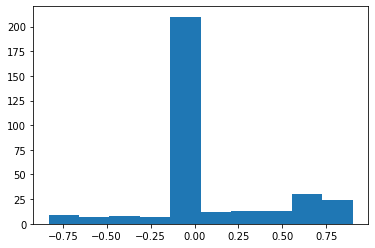

In [9]:
from matplotlib import pyplot as plt

## plot frequency of compound scores
plt.hist(compound_scores)

https://github.com/cjhutto/vaderSentiment#about-the-scoring
    positive sentiment: compound score >= 0.05
    neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    negative sentiment: compound score <= -0.05
